In [296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from scipy.cluster import hierarchy

In [297]:
dfmovies = pd.read_csv('../movies/movies_description.txt', sep='|', header=None)
dfusers  = pd.read_csv('../movies/users_description.txt', sep='|', header=None)
dfscores = pd.read_csv('../movies/movies_users.txt', sep='\t', header=None)

In [298]:
dfusers.head()

,0,1,2,3,4
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [299]:
dfmovies.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [300]:
dfscores.head()

,0,1,2,3
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [301]:
n_users = len(dfusers.values)
n_movie = len(dfmovies.values)
n_users, n_movie

(943, 1682)

In [302]:
evaluations = np.zeros((n_movie, n_users))
evaluations[dfscores.values[:,1]-1, dfscores.values[:,0]-1] = dfscores.values[:,2]

dfevaluations = pd.DataFrame(evaluations, index = dfmovies.values[:,1], columns = np.arange(n_users) + 1)
dfevaluations

,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
Toy Story (1995),5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
GoldenEye (1995),3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
Four Rooms (1995),4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Get Shorty (1995),3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
Copycat (1995),3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mat' i syn (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B. Monkey (1998),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sliding Doors (1998),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You So Crazy (1994),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Filtering

In [303]:
tmovies = list(dfevaluations.index)
idusers = dfevaluations.columns
for i in range(n_movie):
    tmovies[i] = str(tmovies[i]).split('(')[0]
tmovies = np.array(tmovies)
# tmovies[:8]

In [304]:
bevaluations = evaluations != 0
bevaluations

array([[ True,  True, False, ...,  True, False, False],
       [ True, False, False, ..., False, False,  True],
       [ True, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [305]:
neval = np.sum( bevaluations, axis=1 )
idx = np.argsort(neval)[::-1]
idx = idx[:100]

evaluations = evaluations[idx, :]
tmovies = np.array(tmovies)
tmovies = tmovies[idx]

In [306]:
neval = np.sum( bevaluations, axis=0 )
idx = np.argsort(neval)[::-1]
idx = idx[:200]

evaluations = evaluations[:, idx]
idusers = idusers[idx]

In [307]:
dfevaluations = pd.DataFrame(evaluations, index=tmovies, columns=idusers)
dfevaluations.head()

,405,655,13,450,276,416,537,303,234,393,...,887,943,82,751,721,715,757,586,664,862
Star Wars,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,...,5.0,4.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0
Contact,0.0,2.0,4.0,4.0,5.0,5.0,4.0,4.0,2.0,4.0,...,1.0,0.0,0.0,0.0,3.0,0.0,5.0,0.0,0.0,5.0
Fargo,0.0,3.0,5.0,4.0,5.0,5.0,4.0,5.0,4.0,1.0,...,2.0,5.0,5.0,4.0,0.0,2.0,3.0,0.0,5.0,5.0
Return of the Jedi,5.0,3.0,5.0,4.0,5.0,5.0,2.0,5.0,3.0,4.0,...,5.0,4.0,4.0,5.0,5.0,4.0,3.0,4.0,0.0,5.0
Liar Liar,0.0,3.0,2.0,4.0,4.0,4.0,1.0,4.0,3.0,4.0,...,5.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0


# Analisis de componentes principales

In [308]:
X = evaluations
n = len(X)

In [309]:
model = PCA()
model.fit(X)
X2 = model.transform(X)
X2 = X2[:, :3]

[0.191 0.077 0.049 0.041 0.033 0.025 0.022 0.021 0.02  0.019 0.017 0.016
 0.016 0.015 0.014 0.014 0.013 0.013 0.013 0.012 0.012 0.012 0.011 0.011
 0.011 0.01  0.01  0.009 0.009 0.009 0.009 0.009 0.009 0.008 0.008 0.008
 0.007 0.007 0.007 0.007 0.007 0.006 0.006 0.006 0.006 0.006 0.006 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.004 0.004 0.004 0.004 0.004
 0.004 0.004 0.004 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.   ]


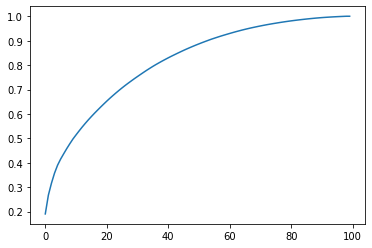

In [310]:
exp_var = model.explained_variance_ratio_
print(np.round(exp_var,3)) # Percentage of importance from every variable
exp_var_acum = np.cumsum(exp_var)
plt.figure()
plt.plot(exp_var_acum)
plt.show()

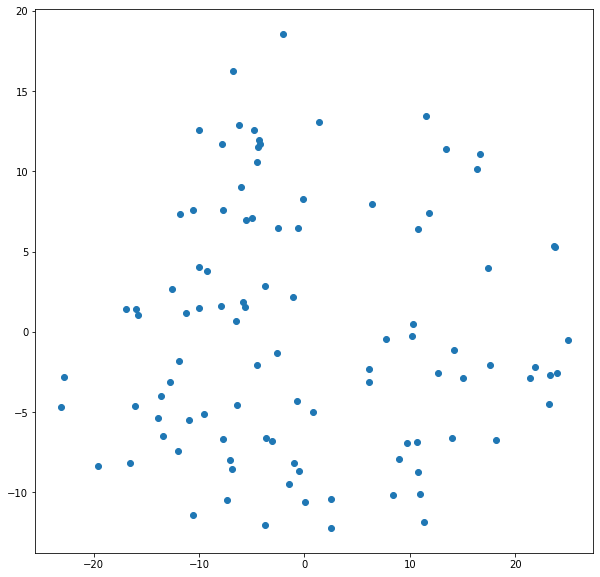

In [311]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(X2[:,0], X2[:,1])

C:\Users\david\AppData\Local\Temp\ipykernel_11140\1331213749.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 0, 'Z')

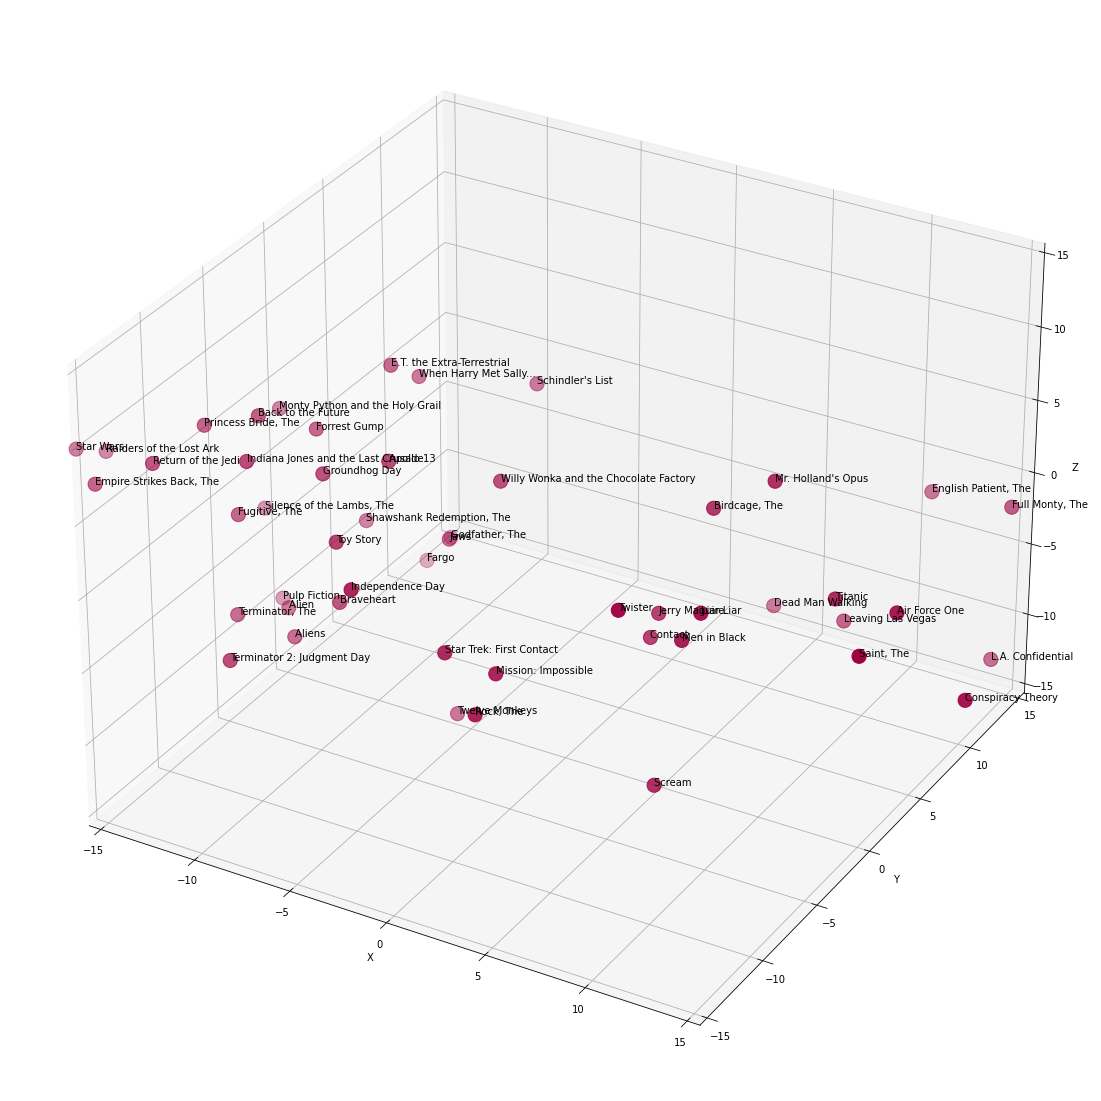

In [318]:
fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection='3d')

just = 50

for i, ((x, y, z), name) in enumerate(zip(X2, tmovies)):
    if i == just: break
    label = '(%d, %d, %d)' % (x, y, z)
    ax.text(x, y, z, name)

colors = ('r', 'g', 'b', 'k')
x = np.random.sample(just*len(colors))
y = np.random.sample(just*len(colors))
c_list = []
for c in colors:
    c_list.append([c]*just)
x_sct = X2[:just].copy()
ax.scatter(x_sct[:,0], x_sct[:,1], zs=x_sct[:,2], c=plt.cm.Spectral(0.0), label='points in (x,z)',s=200)

ax.set_xlim(-15, 15)
ax.set_ylim(-15, 15)
ax.set_zlim(-15, 15)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')